In [69]:
#Importar librerías necesarias para el EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from datetime import datetime

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL de la API en formato CSV
HISTORIC_ALL_STATES = "https://api.covidtracking.com/v1/states/daily.csv"

def obtener_datos_csv(url):
    try:
        df = pd.read_csv(url)
        return df
    except Exception as e:
        print(f"Error al obtener datos de {url}: {e}")
        return None

# Obtener datos en formato CSV
df = obtener_datos_csv(HISTORIC_ALL_STATES)

# Imprimir los primeros registros de los datos
if df is not None:
    print("Primeros registros de los datos:")
    print(df.head())
else:
    print("No se pudieron obtener los datos")



Cantidad de valores faltantes en la columna 'probableCases':
11509


In [17]:
valores_nulos_por_columna = df.isnull().sum()

print(valores_nulos_por_columna)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

In [18]:
porcentaje_nulos = df.isnull().mean() * 100

# Imprimir el resultado
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)


Porcentaje de valores nulos por columna:
date                             0.000000
state                            0.000000
positive                         0.904716
probableCases                   55.384986
negative                        36.044273
pending                         89.711261
totalTestResultsSource           0.000000
totalTestResults                 0.798845
hospitalizedCurrently           16.559192
hospitalizedCumulative          40.413859
inIcuCurrently                  44.003850
inIcuCumulative                 81.766121
onVentilatorCurrently           56.082772
onVentilatorCumulative          93.792108
recovered                       42.237729
lastUpdateEt                     2.964389
dateModified                     2.964389
checkTimeEt                      2.964389
death                            4.090472
hospitalized                    40.413859
hospitalizedDischarged          85.226179
dateChecked                      2.964389
totalTestsViral                 30

In [32]:
# Calcula el porcentaje de valores nulos en cada columna
null_percentages = df.isnull().sum() / len(df)

# Filtra las columnas que tienen más del 80% de valores nulos
columns_to_drop = null_percentages[null_percentages > 0.8].index

# Crea un nuevo dataset sin las columnas filtradas
new_df = df.drop(columns=columns_to_drop)

# Calcula el porcentaje de valores nulos en cada columna
null_percentages = df.isnull().sum() / len(df)

# Filtra las columnas que tienen entre el 50% y el 19% de valores nulos
columns_to_check = null_percentages[(null_percentages < 0.79) & (null_percentages > 0.5)].index

# Imprime las columnas que cumplen la condición
print("Columnas con entre 50% y 79% de valores nulos:")
for column in columns_to_check:
    print(column)
    
    
    # Imprimir el resultado
print("\nPorcentaje de valores nulos por columna:")
print(porcentaje_nulos)



Columnas con entre 50% y 79% de valores nulos:
probableCases
onVentilatorCurrently
positiveTestsViral
negativeTestsViral
deathConfirmed
deathProbable
totalTestEncountersViral
totalTestsPeopleViral
totalTestsAntibody

Porcentaje de valores nulos por columna:
date                         0.000000
state                        0.000000
positive                     0.904716
probableCases               55.384986
negative                    36.044273
totalTestResultsSource       0.000000
totalTestResults             0.798845
hospitalizedCurrently       16.559192
hospitalizedCumulative      40.413859
inIcuCurrently              44.003850
onVentilatorCurrently       56.082772
recovered                   42.237729
lastUpdateEt                 2.964389
dateModified                 2.964389
checkTimeEt                  2.964389
death                        4.090472
hospitalized                40.413859
dateChecked                  2.964389
totalTestsViral             30.144370
positiveTestsViral  

In [64]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['probableCases', 'positiveTestsViral','negativeTestsViral',
                       'totalTestEncountersViral', 'totalTestsPeopleViral', 'totalTestsAntibody']

# Crear un nuevo DataFrame excluyendo las columnas especificadas
nw_df = new_df.drop(columns=columnas_a_eliminar)

# Imprimir el nuevo DataFrame
print(nw_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      20780 non-null  int64  
 1   state                     20780 non-null  object 
 2   positive                  20592 non-null  float64
 3   negative                  13290 non-null  float64
 4   totalTestResultsSource    20780 non-null  object 
 5   totalTestResults          20614 non-null  float64
 6   hospitalizedCurrently     17339 non-null  float64
 7   hospitalizedCumulative    12382 non-null  float64
 8   inIcuCurrently            11636 non-null  float64
 9   onVentilatorCurrently     9126 non-null   float64
 10  recovered                 12003 non-null  float64
 11  lastUpdateEt              20164 non-null  object 
 12  dateModified              20164 non-null  object 
 13  checkTimeEt               20164 non-null  object 
 14  death 

#La columna date tiene formato Integer, lo cambiamos

In [82]:
nw_df['date'] = nw_df['date'].astype(str)
print (nw_df.date)

def convertir_fecha(valor):
    try:
        fecha = datetime.strptime(valor, '%Y%m%d')
        return fecha
    except ValueError:
        return None
    # Ejemplo de uso
    

nw_df['date'] = nw_df['date'].apply(convertir_fecha)

print(nw_df['date'].dtype)
print(nw_df.date)


KeyError: 'datestr'

datetime64[ns]


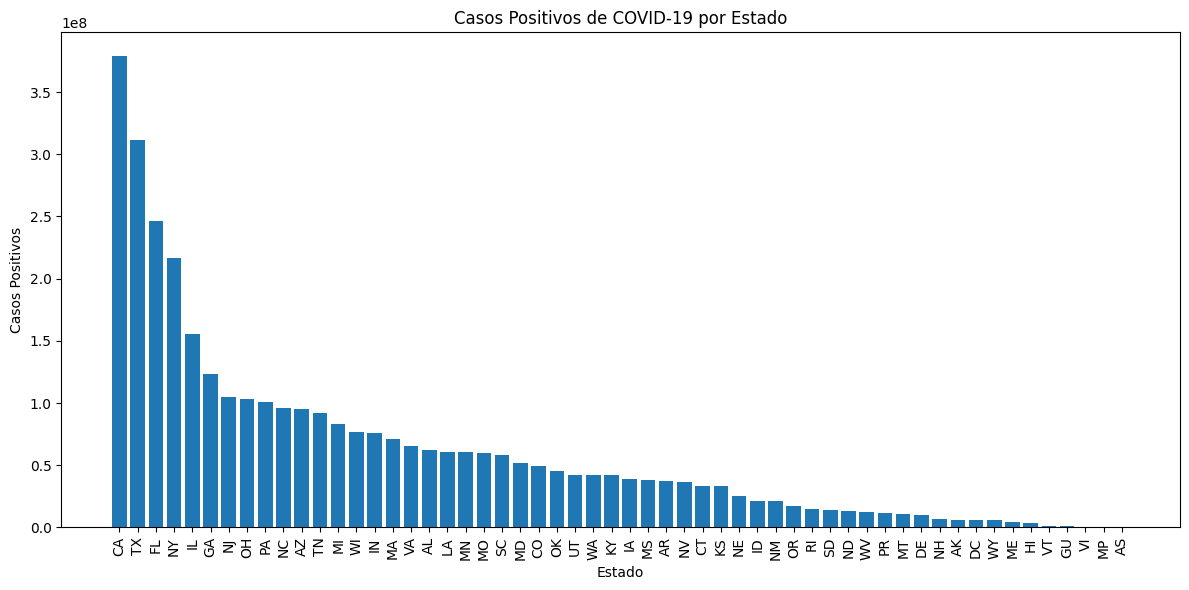

In [37]:
df_casos_por_estado = df[['state', 'positive']]

# Agrupar los datos por estado y sumar los casos positivos
casos_por_estado = df_casos_por_estado.groupby('state')['positive'].sum()

# Ordenar los estados por la cantidad de casos positivos de forma descendente
casos_por_estado = casos_por_estado.sort_values(ascending=False)

# Graficar los casos por estado
plt.figure(figsize=(12, 6))
plt.bar(casos_por_estado.index, casos_por_estado.values)
plt.xlabel('Estado')
plt.ylabel('Casos Positivos')
plt.title('Casos Positivos de COVID-19 por Estado')
plt.xticks(rotation=90)  # Rotar los nombres de los estados para que sean legibles
plt.tight_layout()
plt.show()

#identificamos que a pesar de existir 50 estados en USA, nuestro dataset cuenta con 56 valores en la columna estados. Tras analizar, encontramos que se incluyen en esta lista 6 territorios no catalogados como estados oficiales.

In [40]:
cantidad_estados = df['state'].nunique()

print("Cantidad de estados diferentes:", cantidad_estados)

Cantidad de estados diferentes: 56


In [41]:
# Obtener los valores únicos de una columna específica, por ejemplo 'state'
valores_unicos_state = df['state'].unique()

print("\nValores únicos en la columna 'state':")
print(valores_unicos_state)


Valores únicos en la columna 'state':
['AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


,date,positive,negative,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,onVentilatorCurrently,recovered,death,...,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
count,2.078000e+04,2.059200e+04,1.329000e+04,2.061400e+04,17339.000000,12382.000000,11636.000000,9126.000000,1.200300e+04,19930.000000,...,2.078000e+04,20780.000000,2.078000e+04,20780.000000,20780.000000,20780.0,20780.0,20780.0,20780.0,20780.0
mean,2.020244e+07,1.651560e+05,8.482246e+05,2.186936e+06,1190.576965,9262.762478,359.621176,151.589305,9.424223e+04,3682.216859,...,7.063208e+05,17508.388210,7.061500e+05,24.790712,37.360780,0.0,0.0,0.0,0.0,0.0
std,3.608732e+03,3.267852e+05,1.344501e+06,4.436508e+06,2060.041207,12620.544081,594.831150,207.755157,2.110372e+05,6281.366321,...,1.300339e+06,33586.022461,1.299997e+06,60.162742,208.237151,0.0,0.0,0.0,0.0,0.0
min,2.020011e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,2.000000e+00,0.000000,...,0.000000e+00,-130545.000000,0.000000e+00,-201.000000,-12257.000000,0.0,0.0,0.0,0.0,0.0
25%,2.020060e+07,5.753750e+03,5.394125e+04,1.040498e+05,166.500000,985.250000,60.000000,29.000000,3.379000e+03,161.250000,...,2.577975e+04,1205.750000,2.565875e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,2.020090e+07,4.606450e+04,3.059720e+05,6.552670e+05,531.000000,4472.000000,172.000000,86.000000,1.761800e+04,1108.000000,...,1.937255e+05,6125.000000,1.935810e+05,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,2.020120e+07,1.779580e+05,1.056611e+06,2.264766e+06,1279.000000,12248.500000,380.000000,185.000000,9.315250e+04,4387.500000,...,7.737408e+05,19086.500000,7.737408e+05,24.000000,36.000000,0.0,0.0,0.0,0.0,0.0
max,2.021031e+07,3.501394e+06,1.018694e+07,4.964601e+07,22851.000000,82237.000000,5225.000000,2425.000000,2.502609e+06,54124.000000,...,1.125679e+07,473076.000000,1.124825e+07,2559.000000,16373.000000,0.0,0.0,0.0,0.0,0.0
